<a href="https://colab.research.google.com/github/Shailja-Joshi/first_project/blob/master/Cartoonify_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARTOONIFY AN IMAGE USING OpenCV**

---



# **Importing the required modules**

In [ ]:
import cv2 #for image processing
# #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image



# **Loading Image**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

img=Image.open('/content/drive/My Drive/cartoonify/sj.jpg')

In [ ]:
img1 = cv2.imread('/content/drive/My Drive/cartoonify/sj.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# **Resizing Image**

: We resize the image after each transformation to display all the images on a similar scale at last.

In [ ]:
if img1 is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
img1 = cv2.resize(img1, (960, 540))

# **Transforming an image to grayscale**

: cvtColor(image, flag) is a method in cv2 which is used to transform an image into the colour-space mentioned as ‘flag’.

: we use the BGR2GRAY flag, This returns the image in grayscale.

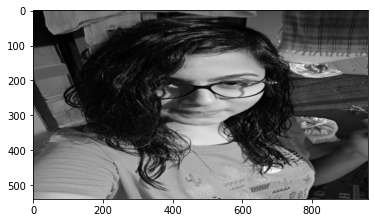

In [ ]:
grayimg=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap='gray')


# **Smoothening a grayscale image**

: To smoothen an image, we simply apply a blur effect.

: This is done using medianBlur() function. Here, the center pixel is assigned a mean value of all the pixels which fall under the kernel. In turn, creating a blur effect.

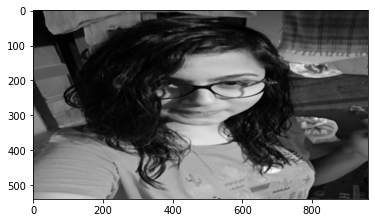

In [ ]:

smoothGrayImg=cv2.medianBlur(grayimg,5)
plt.imshow(smoothGrayImg,cmap='gray')


# **Retrieving the edges of an image**

: Cartoon effect has two specialties-
Highlighted Edges & Smooth colors

: In this step, we will work on the first specialty. Here, we will try to retrieve the edges and highlight them.

: This is attained by the adaptive thresholding technique.

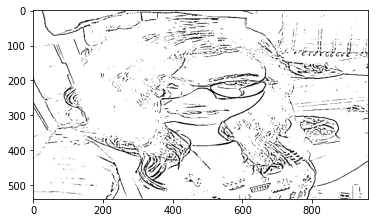

In [ ]:
getEdge = cv2.adaptiveThreshold(smoothGrayImg, 255, 
  cv2.ADAPTIVE_THRESH_MEAN_C, 
  cv2.THRESH_BINARY, 5, 5)
ReSized4 = cv2.resize(getEdge, (960, 540))
plt.imshow(ReSized4, cmap='gray')


# **Preparing a Mask Image**

: Now, we finally work on the second specialty. We prepare a lightened color image that we mask with edges at the end to produce a cartoon image.

: We use bilateralFilter which removes the noise. It can be taken as smoothening of an image to an extent.

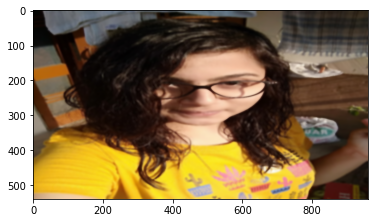

In [ ]:
colorImage = cv2.bilateralFilter(img1, 9, 300, 300)
ReSized5 = cv2.resize(colorImage, (960, 540))
plt.imshow(ReSized5, cmap='gray')

# **Giving a Cartoon Effect**

: Combine the two specialties. This will be done using MASKING. We perform bitwise and on two images to mask them. Remember, images are just numbers?

: Yes, so that’s how we mask edged image on our “BEAUTIFY” image.

This finally CARTOONIFY our image!

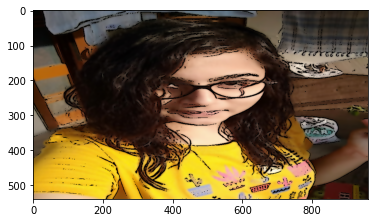

In [ ]:
cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
ReSized6 = cv2.resize(cartoonImage, (960, 540))
plt.imshow(ReSized6, cmap='gray')

# **Voila! This finally CARTOONIFY our image!**